In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [2]:
def load_data():
    df = pd.read_csv("Concrete_Data.csv")
    return df

df = load_data()
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
def extract_X_y(df):
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    return X, y

X, y = extract_X_y(df)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
regRi = Ridge()
regSVRlinear = SVR(kernel="linear")
regRF = RandomForestRegressor()
regSVRrbf = SVR(kernel="rbf")

In [6]:
def evaluate_regression(r, X_train, X_test, y_train, y_test):
    r.fit(X_train, y_train)
    y_pred = r.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    print("-----------------------")
    print(regression, "regression")
    print("R2 score:", r2)
    print(RMSE)

for r, regression in zip([regRi, regSVRlinear, regRF, regSVRrbf], ["Ridge", "SVR-Linear", "RandomForest", "SVR-rbf"]):
    evaluate_regression(r, X_train, X_test, y_train, y_test)

-----------------------
Ridge regression
R2 score: 0.627553352125321
9.796473627809146
-----------------------
SVR-Linear regression
R2 score: 0.5103615597783469
11.232475801763137
-----------------------
RandomForest regression
R2 score: 0.8734042939497682
5.71146114184015
-----------------------
SVR-rbf regression
R2 score: 0.2319792895104038
14.067735833659809


In [7]:
regRF.fit(X_train, y_train)
y_pred = regRF.predict(X_test)
y_pred_train = regRF.predict(X_train)

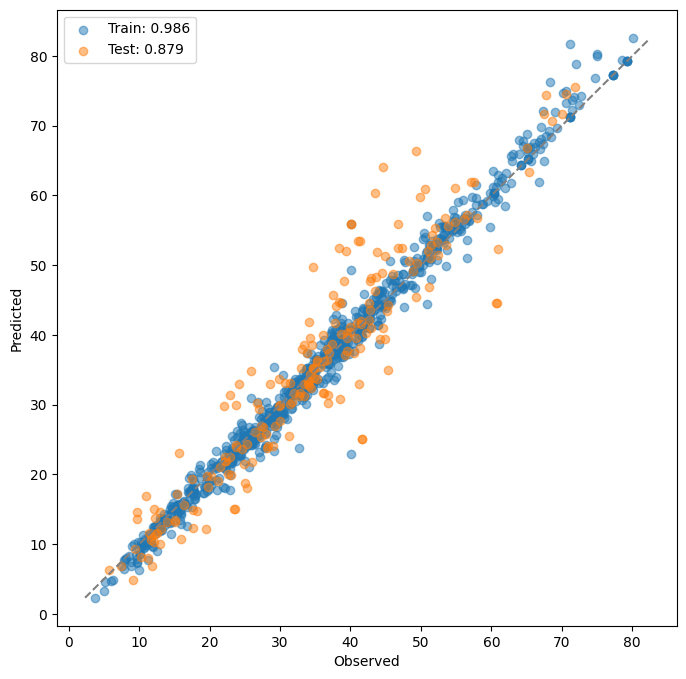

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(y_pred_train, y_train, alpha=0.5, label="Train: %.3f" %r2_score(y_train, y_pred_train))
plt.scatter(y_pred, y_test, alpha=0.5, label="Test: %.3f" %r2_score(y_test, y_pred))
plt.plot(np.arange(min(y),max(y)), np.arange(min(y),max(y)), linestyle="dashed", color="gray")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.legend()

Text(0.5, 0, 'Contribution')

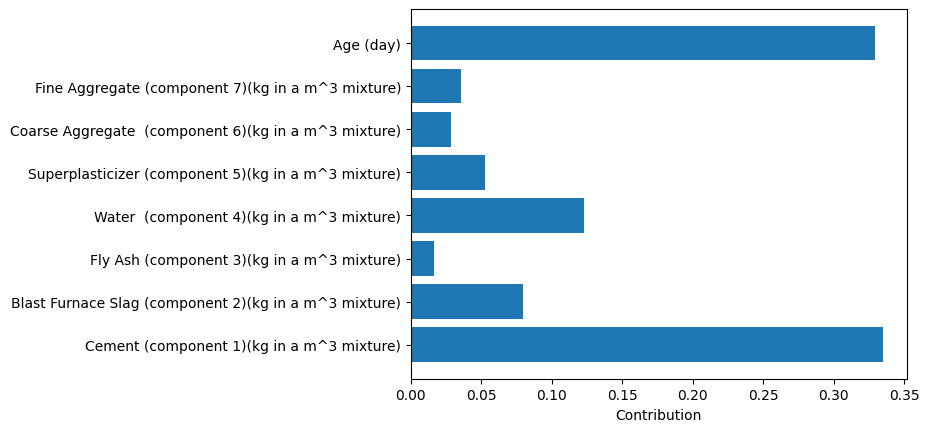

In [9]:
plt.barh(np.arange(len(regRF.feature_importances_)), regRF.feature_importances_)
plt.yticks(np.arange(len(X.columns)), X.columns)
plt.xlabel("Contribution")

Text(0, 0.5, 'Compressive strength, MPa')

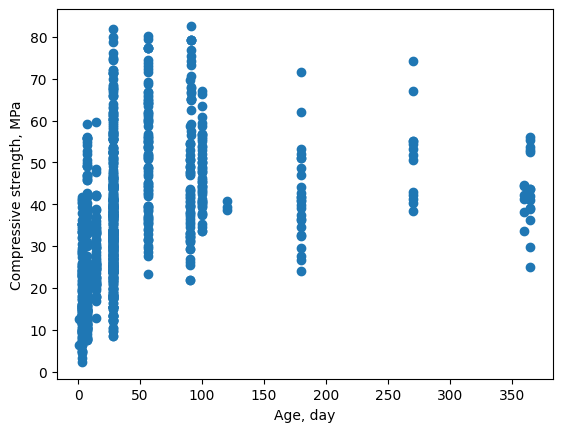

In [10]:
plt.scatter(df["Age (day)"], df["Concrete compressive strength(MPa, megapascals) "])
plt.xlabel("Age, day")
plt.ylabel("Compressive strength, MPa")

Text(0, 0.5, 'Compressive strength, MPa')

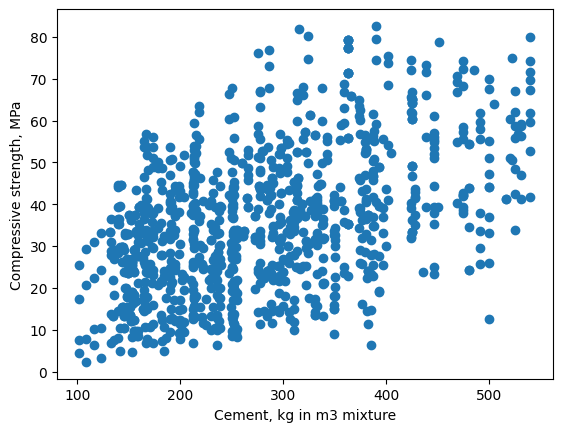

In [11]:
plt.scatter(df["Cement (component 1)(kg in a m^3 mixture)"], df["Concrete compressive strength(MPa, megapascals) "])
plt.xlabel("Cement, kg in m3 mixture")
plt.ylabel("Compressive strength, MPa")

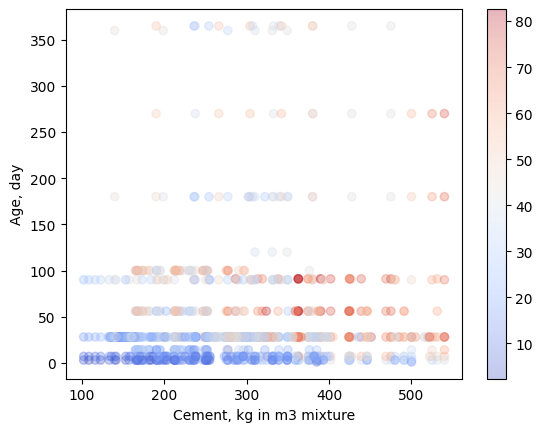

In [12]:
plt.scatter(
    df["Cement (component 1)(kg in a m^3 mixture)"],
    df["Age (day)"],
    c=df["Concrete compressive strength(MPa, megapascals) "],
    cmap = "coolwarm",
    alpha = 0.3
)
plt.xlabel("Cement, kg in m3 mixture")
plt.ylabel("Age, day")
plt.colorbar()